<a href="https://colab.research.google.com/github/JavierEduardoRomeroTellez/ADP-Stock-Prediction/blob/main/ADP_Stock_Predict_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of future values based on ADP Inc. stock market data.
> Romero Tellez Javier Eduardo

## Preparation of the environment

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from math import sqrt

Import the dataset

In [ ]:
data = pd.read_csv('ADP-Data.csv')

## Exploratory analysis and data cleaning

Check for null data

In [ ]:
data.isnull().sum()

Unnamed: 0    0
Date          0
High          0
Low           0
Open          0
Close         0
Volume        0
Adj Close     0
dtype: int64

As can be seen there is a column that isn't needed so let's delete it.

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace = True)

Verify that the date column is of type datetime

In [ ]:
data['Date'].head()

0    1980-03-17
1    1980-03-18
2    1980-03-19
3    1980-03-20
4    1980-03-21
Name: Date, dtype: object

As it is an object type transform it to datetime type

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

Verify that the change has been made

In [ ]:
data['Date'].head()

0   1980-03-17
1   1980-03-18
2   1980-03-19
3   1980-03-20
4   1980-03-21
Name: Date, dtype: datetime64[ns]

Now describe the numerical data to see how it behaves

In [ ]:
data.select_dtypes('number').describe()

,High,Low,Open,Close,Volume,Adj Close
count,10752.000000,10752.000000,10752.000000,10752.000000,1.075200e+04,10752.000000
mean,45.513600,44.666703,44.896936,45.118323,2.063540e+06,37.623797
std,53.810046,52.828649,53.398649,53.349075,1.417562e+06,52.196452
min,0.927141,0.908554,0.000000,0.911652,8.070100e+03,0.517667
25%,5.552316,5.462476,5.415141,5.527532,1.196101e+06,3.176103
50%,33.055778,32.219095,32.515629,32.714761,1.758100e+06,21.508132
75%,49.033276,48.300176,48.529410,48.728345,2.552245e+06,37.441774
max,261.689996,259.649988,260.369995,261.040002,3.133089e+07,259.917322


As can be seen the Open minimum is 0 which is not a valid value so let's clean up those 0's

In [ ]:
data = data[data['Open'] != 0].reset_index(drop=True)

Now, in order to see how the data behave, let's look at the correlation between them.

In [ ]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999878,0.999927,0.999924,0.032095,0.996287
Low,0.999878,1.000000,0.999913,0.999917,0.027961,0.996231
Open,0.999927,0.999913,1.000000,0.999844,0.030008,0.996186
Close,0.999924,0.999917,0.999844,1.000000,0.030142,0.996333
Volume,0.032095,0.027961,0.030008,0.030142,1.000000,0.011046
Adj Close,0.996287,0.996231,0.996186,0.996333,0.011046,1.000000


Now using matplot it is possible visualize the comparison between the highest and lowest values.

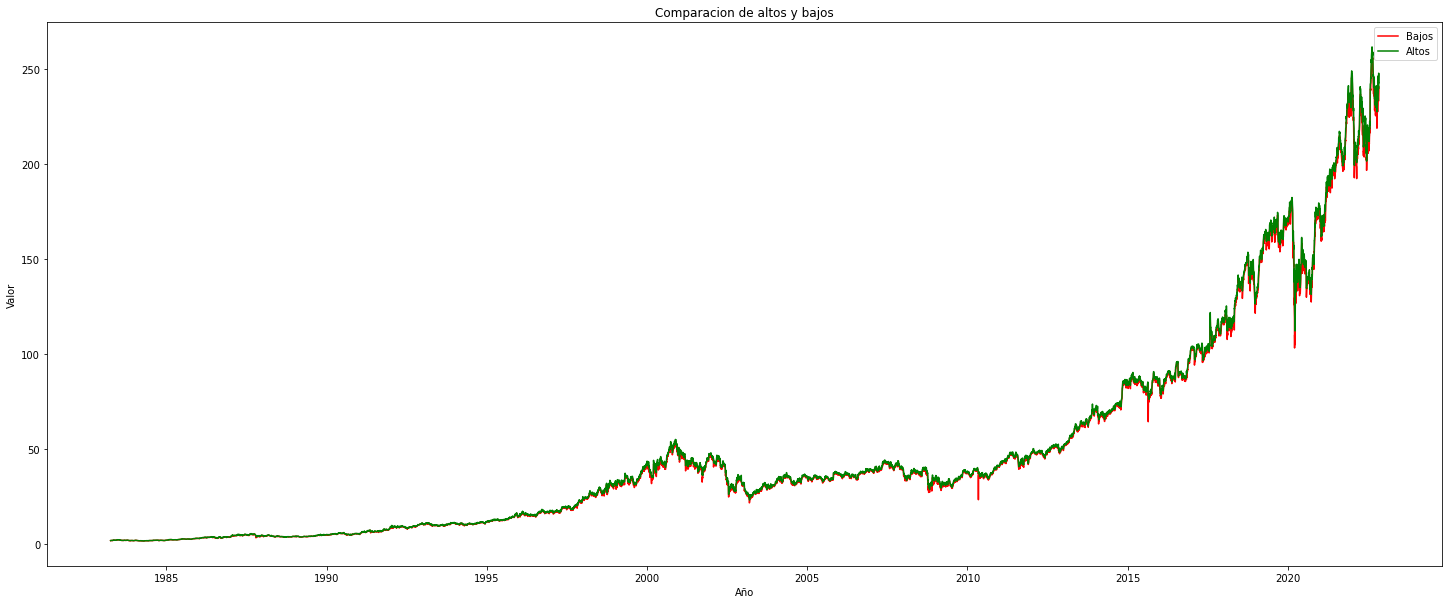

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(data['Date'],data['Low'],color='red',label='Bajos')
plt.plot(data['Date'],data['High'],color='green',label='Altos')
plt.title('Comparacion de altos y bajos')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.show()

Can also see the comparison between the opening and closing value

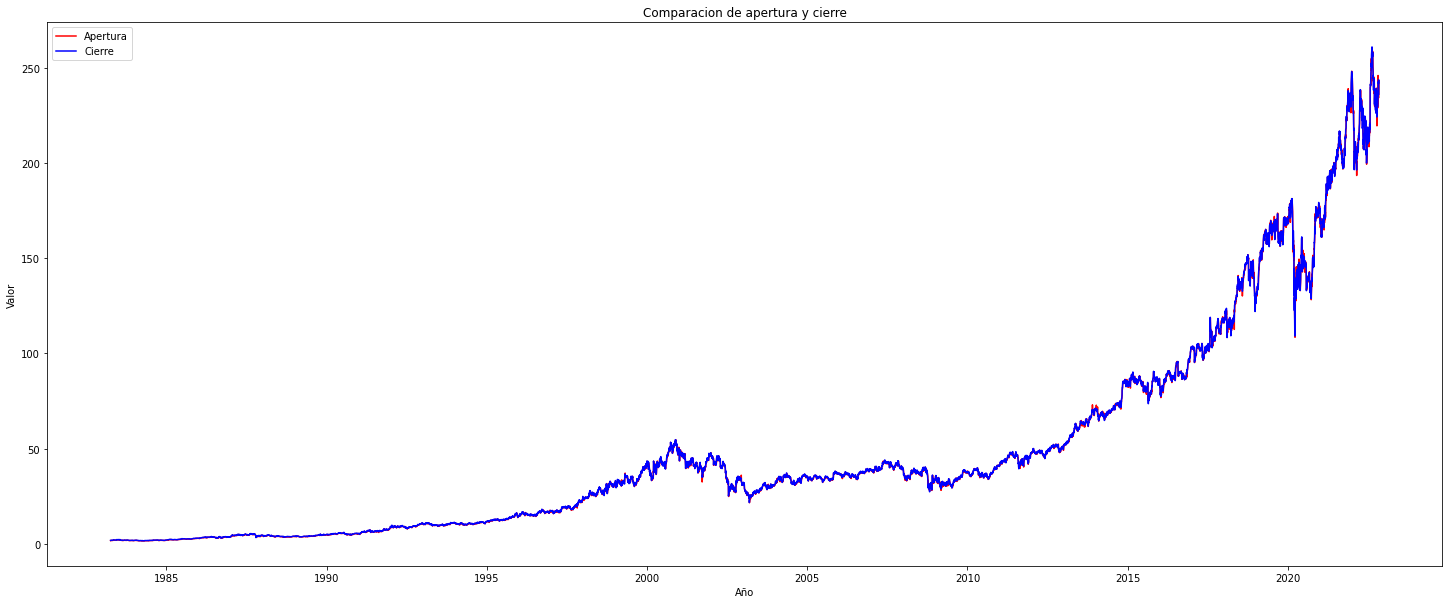

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(data['Date'],data['Open'],color='red',label='Apertura')
plt.plot(data['Date'],data['Close'],color='blue',label='Cierre')
plt.title('Comparacion de apertura y cierre')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.show()

Can observe the trend of the value after adjustment over time.

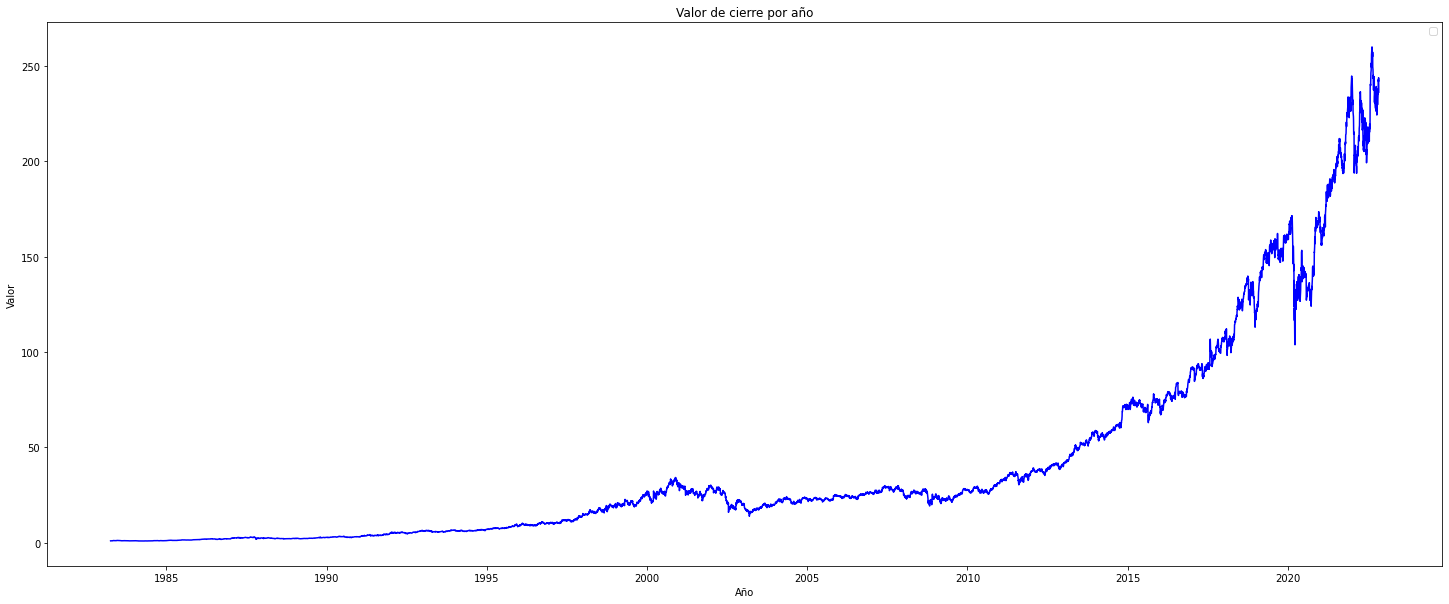

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(data['Date'],data['Adj Close'],color='blue')
plt.title('Valor de cierre por año')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.legend()
plt.show()

## Model training

Begin by separating the independent variables from the independent variable into x and y respectively

In [ ]:
Y = data['Adj Close']
X = data.drop(['Date', 'Adj Close'], axis=1)

Then split the data into training and test data with a ratio of 80/20.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Create the model

In [ ]:
LR = LinearRegression()

Fit it using the training data

In [ ]:
LR.fit(X_train, Y_train)

LinearRegression()

Make the prediction using the `predict()` method and check the score it returns.

In [ ]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

print('Rendimiento con los datos de prueba: ', LR.score(X_test, Y_test))
print('Rendimiento con los datos de entrenamiento: ', LR.score(X_train, Y_train))

Rendimiento con los datos de prueba:  0.9933138774677994
Rendimiento con los datos de entrenamiento:  0.9930609621832346


Then in order to visually compare how well the prediction does, put in a dataframe the actual data and the data that was predicted for the test data case.

In [ ]:
results = pd.DataFrame({'Real': Y_test, 'Predicted':y_test_pred })

In [ ]:
results

,Real,Predicted
9043,139.238748,140.556141
7458,40.891508,43.132138
9559,174.691324,171.328509
338,1.079064,-7.552559
1656,2.772972,-1.432062
...,...,...
537,1.311497,-4.776272
741,1.948591,-4.129657
4565,27.044893,35.760596
5619,22.263605,26.095030


To evaluate the model let's first use the R2 score which indicates the level of correlation between the predicted value and the actual value.

In [ ]:
accuracy_LR_train = metrics.r2_score(Y_train, y_train_pred)
print("R2 De entrenamiento para el modelo de regresion", accuracy_LR_train)

accuracy_LR_test = metrics.r2_score(Y_test, y_test_pred)
print("R2 De prueba para el modelo de regresion", accuracy_LR_test)

R2 De entrenamiento para el modelo de regresion 0.9930609621832346
R2 De prueba para el modelo de regresion 0.9933138774677994


As a second metric the RMSE or root mean square error indicates the difference between the actual value and the predicted value.

In [ ]:
RMSE_LR_train = sqrt(metrics.mean_squared_error(Y_train, y_train_pred))
print("RMSE para los datos de entrenamiento", RMSE_LR_train)

RMSE_LR_test = sqrt(metrics.mean_squared_error(Y_test, y_test_pred))
print("RMSE para los datos de prueba", RMSE_LR_test)

RMSE para los datos de entrenamiento 4.416705704462956
RMSE para los datos de prueba 4.3759138142242655


## Conclusión

The result obtained is quite good, both for the training and test data the model behaves well, if one wants to predict future data it is certain that it will not have a very large variation, although with investments there can always be external circumstances that can drastically change the value of the stocks.